##Import Library

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#Load Raw Data

In [22]:
data = pd.read_csv('/content/house_price_data.txt')

In [23]:
data

,tourist,rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


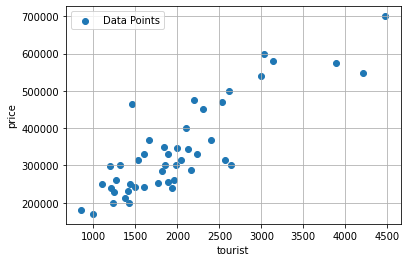

In [28]:
# Plot data selling_price dengan ex_showroom_price

X = data['tourist'].tolist()
Y = data['price'].tolist()

plt.scatter(X, Y, label='Data Points')
plt.grid()
plt.xlabel("tourist")
plt.ylabel("price")
plt.legend()
plt.show()

In [32]:
#memisah data untuk training dan testing

data_train = data.head(36)
data_test = data.tail(9)

X_train = data_train['tourist'].values
Y_train = data_train['price'].values

X_test = data_test['tourist'].values
Y_test = data_test['price'].values

In [35]:
# Mencari nilai Y-intersept(a) dan Slope(b)

n = len(X_train)
def Sum (Train):
    E = 0
    for i in range(n):
        E += Train[i]
    return E

def Sum2 (Train):
    E = 0
    for i in range(n):
        E += Train[i]**2
    return E

def SumXY (Train1, Train2):
    E = 0
    for i in range(n):
        E += Train1[i]*Train2[i]
    return E

Sum_X = Sum(X_train)
Sum_Y = Sum(Y_train)
Sum_X2 = Sum2(X_train)
Sum_Y2 = Sum2(Y_train)
Sum_XY = SumXY(X_train, Y_train)

a = ((Sum_Y*Sum_X2)-(Sum_X*Sum_XY))/(n*Sum_X2-(Sum_X**2))
b = (n*Sum_XY-(Sum_X*Sum_Y))/(n*Sum_X2-(Sum_X**2))

print(f"Y-intersept = {a}")
print(f"Slope = {b}")

Y-intersept = 43220.27534902201
Slope = 151.31574362429453


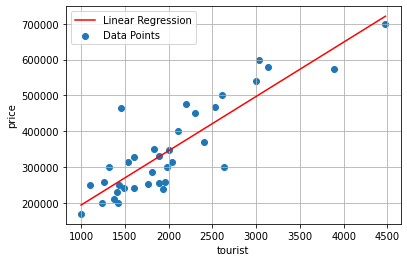

In [36]:
# Mencari garis regresi dan plot dengan data training

X = np.linspace (np.min(X_train), np.max(X_train))
Y = b*X + a

plt.plot(X, Y, color='red',label='Linear Regression')
plt.scatter(X_train, Y_train, label='Data Points')
plt.grid()
plt.xlabel("tourist")
plt.ylabel("price")
plt.legend()
plt.show()